In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#pip install -qU python-gdcm pydicom pylibjpeg

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns #plotting
import matplotlib.pyplot as plt #plotting

In [4]:
data = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/train.csv")
data.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

### Missing values

In [6]:
data.isna().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

<AxesSubplot:>

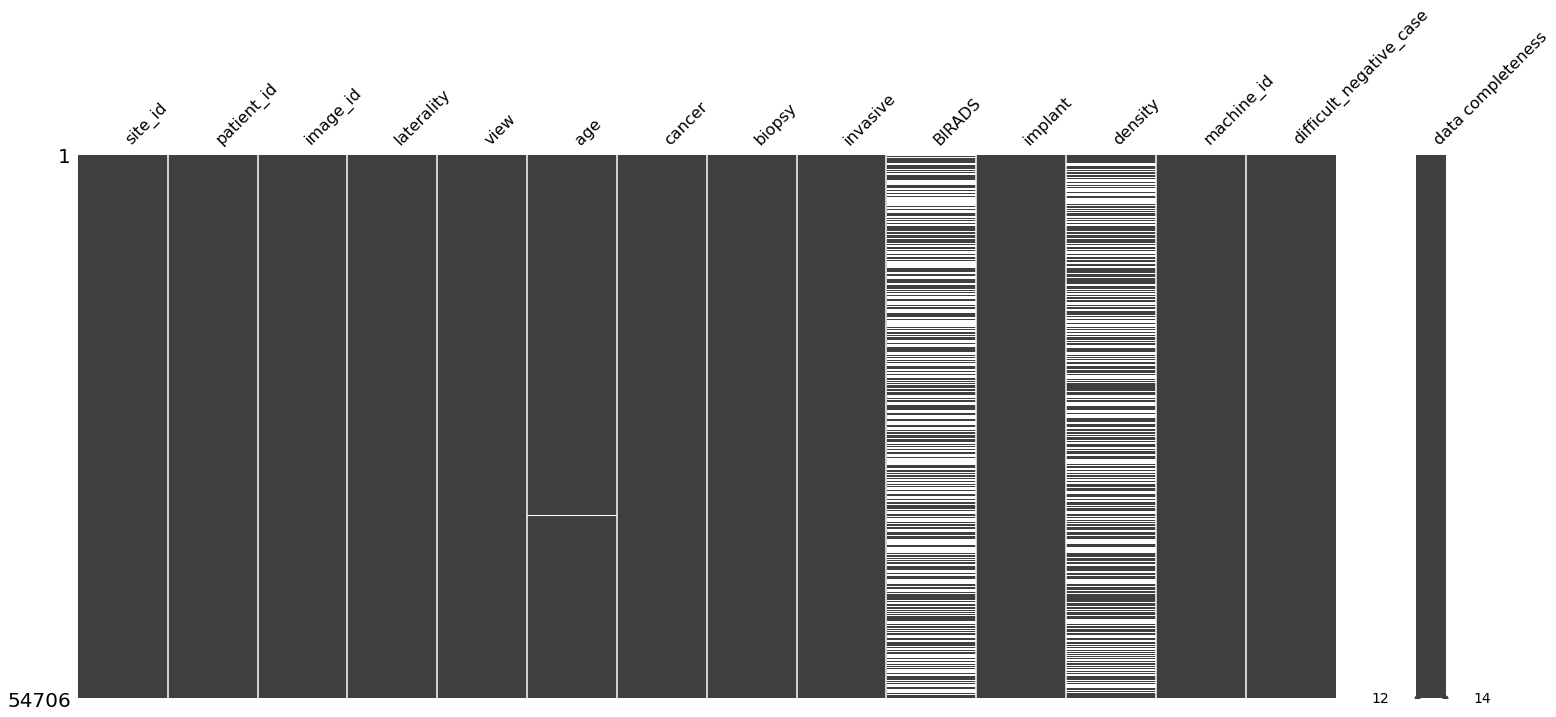

In [7]:
import missingno as msno

msno.matrix(data,labels = True)

### EDA

In [8]:
temp = data.groupby(by="cancer").count()["patient_id"]
temp.reset_index().head()

,cancer,patient_id
0,0,53548
1,1,1158


Text(0, 0.5, 'Total images')

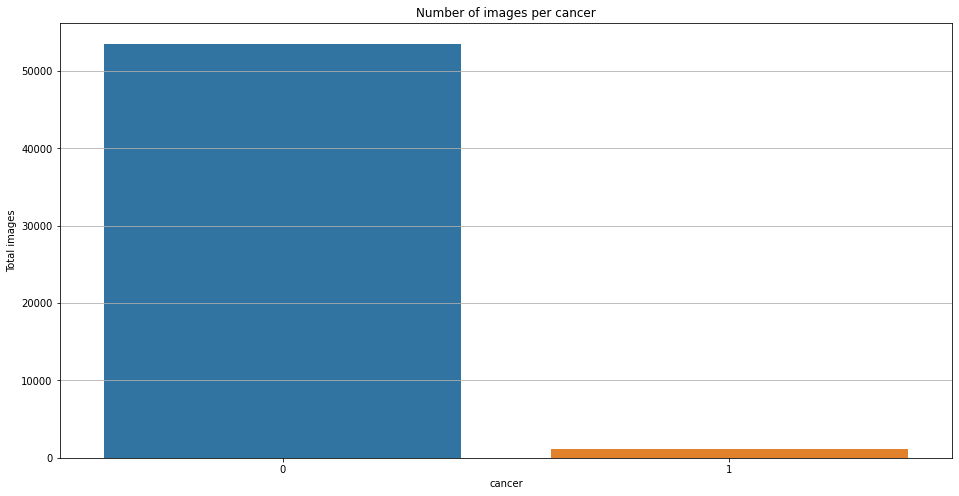

In [9]:
plt.figure(figsize=(16,8))
plt.grid()
plt.title("Number of images per cancer")
sns.barplot(data=temp.reset_index(),x="cancer",y="patient_id")
plt.ylabel("Total images")

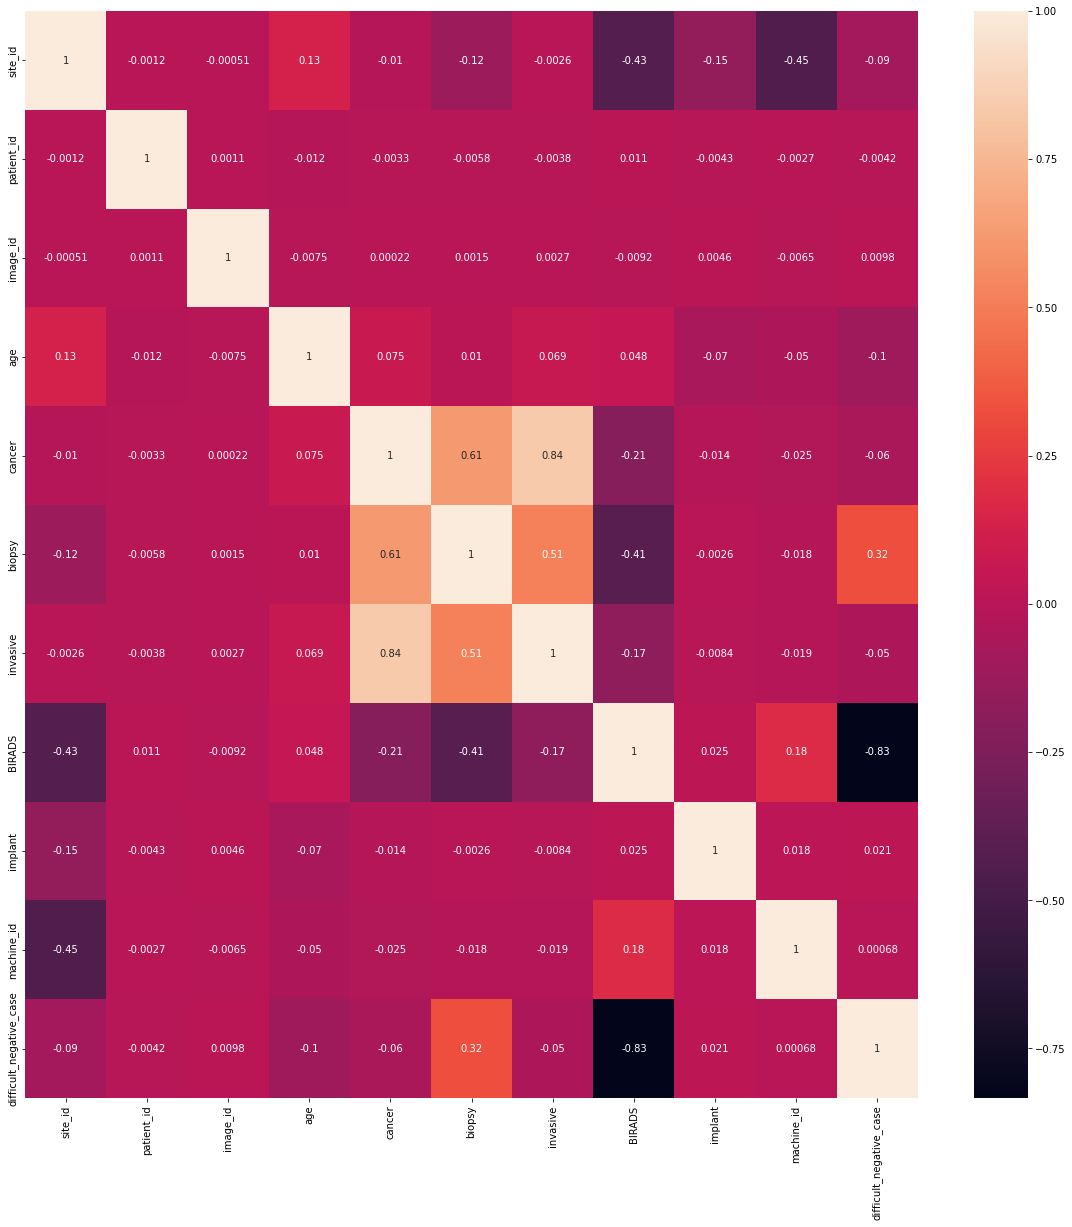

In [10]:
plt.figure(figsize=(20, 20))
dataplot = sns.heatmap(data.corr(), annot=True)

Data is highly unbalanced and BIRADs, density has large number of missing values. Age also has small number of missing values

### Exploring images

images are in dcm format. Lets look at few images

following breasts are healthy

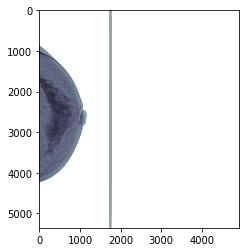

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10006.1.462822612
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10006.1.462822612
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183901.561976'
(0010, 0020) Patient ID                          LO: '10006'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10006
(0020, 000e) Series Instance U

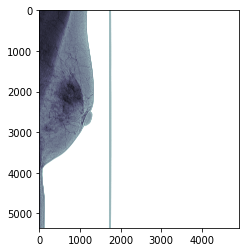

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10006.1.1459541791
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10006.1.1459541791
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183901.792591'
(0010, 0020) Patient ID                          LO: '10006'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10006
(0020, 000e) Series Instance

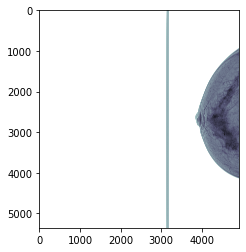

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10006.1.1874946579
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10006.1.1874946579
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183902.142082'
(0010, 0020) Patient ID                          LO: '10006'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10006
(0020, 000e) Series Instance

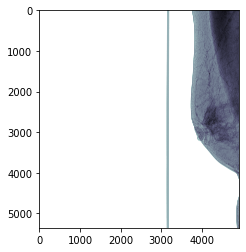

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10006.1.1864590858
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10006.1.1864590858
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183901.986648'
(0010, 0020) Patient ID                          LO: '10006'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10006
(0020, 000e) Series Instance

In [11]:
import pydicom
import os

folder_path = "/kaggle/input/rsna-breast-cancer-detection/train_images/10006"

for filename in os.listdir(folder_path):
    if filename.endswith(".dcm"):
        filepath = os.path.join(folder_path, filename)
        ds = pydicom.dcmread(filepath)
        # display the image
        plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
        plt.show()
        # extract metadata and print
        print(ds)

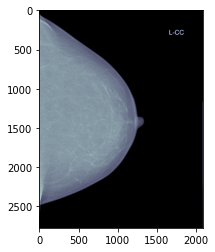

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10179.1.760010915
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10179.1.760010915
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '184008.100088'
(0010, 0020) Patient ID                          LO: '10179'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10179
(0020, 000e) Series Instance U

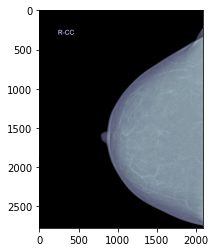

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10179.1.2015481666
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10179.1.2015481666
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '184008.546619'
(0010, 0020) Patient ID                          LO: '10179'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10179
(0020, 000e) Series Instance

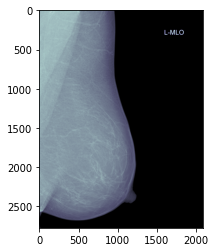

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10179.1.873499971
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10179.1.873499971
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '184008.228907'
(0010, 0020) Patient ID                          LO: '10179'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10179
(0020, 000e) Series Instance U

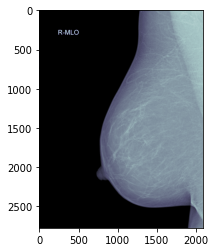

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10179.1.610638958
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10179.1.610638958
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '184008.416504'
(0010, 0020) Patient ID                          LO: '10179'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.10179
(0020, 000e) Series Instance U

In [12]:
import pydicom
import os

folder_path = "/kaggle/input/rsna-breast-cancer-detection/train_images/10179"

for filename in os.listdir(folder_path):
    if filename.endswith(".dcm"):
        filepath = os.path.join(folder_path, filename)
        ds = pydicom.dcmread(filepath)
        # display the image
        plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
        plt.show()
        # extract metadata and print
        print(ds)

Following breasts have cancer

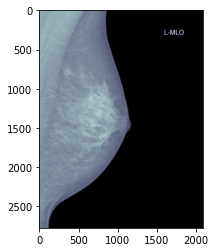

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.106.1.2018825992
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.106.1.2018825992
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183936.217694'
(0010, 0020) Patient ID                          LO: '106'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.106
(0020, 000e) Series Instance UID    

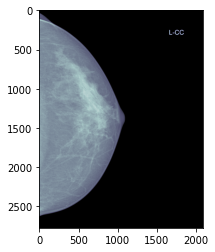

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.106.1.76321767
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.106.1.76321767
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183936.055985'
(0010, 0020) Patient ID                          LO: '106'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.106
(0020, 000e) Series Instance UID        

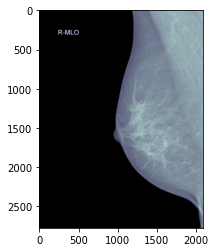

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.106.1.1495797827
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.106.1.1495797827
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183936.513718'
(0010, 0020) Patient ID                          LO: '106'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.106
(0020, 000e) Series Instance UID    

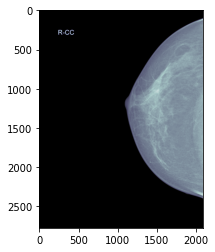

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.106.1.1160585918
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.106.1.1160585918
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183936.371462'
(0010, 0020) Patient ID                          LO: '106'
(0020, 000d) Study Instance UID                  UI: 1.2.840.10009.1.2.3.106
(0020, 000e) Series Instance UID    

In [13]:
import pydicom
import os

folder_path = "/kaggle/input/rsna-breast-cancer-detection/train_images/106"

for filename in os.listdir(folder_path):
    if filename.endswith(".dcm"):
        filepath = os.path.join(folder_path, filename)
        ds = pydicom.dcmread(filepath)
        # display the image
        plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
        plt.show()
        # extract metadata and print
        print(ds)

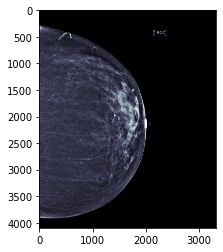

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10130.1.1165309236
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10130.1.1165309236
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183943.951073'
(0010, 0020) Patient ID                          LO: '10130'
(0018, 11a0) Body Part Thickness                 DS: '58.0'
(0

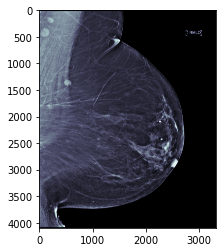

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10130.1.2110820077
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10130.1.2110820077
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183944.955816'
(0010, 0020) Patient ID                          LO: '10130'
(0018, 11a0) Body Part Thickness                 DS: '80.0'
(0

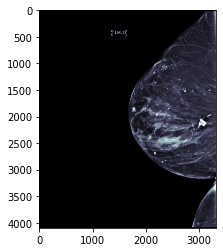

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10130.1.388811999
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10130.1.388811999
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183942.402329'
(0010, 0020) Patient ID                          LO: '10130'
(0018, 11a0) Body Part Thickness                 DS: '73.0'
(001

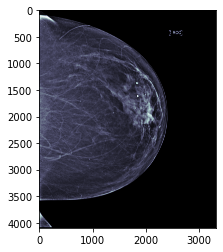

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10130.1.1013166704
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10130.1.1013166704
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183943.452858'
(0010, 0020) Patient ID                          LO: '10130'
(0018, 11a0) Body Part Thickness                 DS: '70.0'
(0

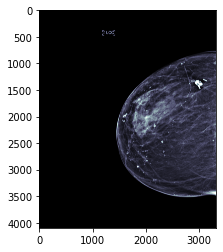

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10130.1.613462606
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10130.1.613462606
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183942.602854'
(0010, 0020) Patient ID                          LO: '10130'
(0018, 11a0) Body Part Thickness                 DS: '74.0'
(001

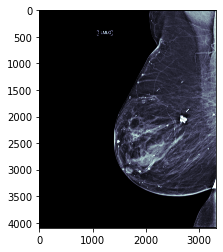

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10130.1.1672636630
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10130.1.1672636630
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183943.093635'
(0010, 0020) Patient ID                          LO: '10130'
(0018, 11a0) Body Part Thickness                 DS: '75.0'
(0

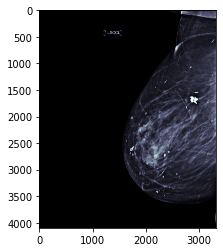

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.10009.1.2.3.10130.1.1360338805
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.840.113654.2.3.1995.2.12.0
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.840.10009.1.2.3.10130.1.1360338805
(0008, 0023) Content Date                        DA: '20221118'
(0008, 0033) Content Time                        TM: '183942.847932'
(0010, 0020) Patient ID                          LO: '10130'
(0018, 11a0) Body Part Thickness                 DS: '82.0'
(0

In [14]:
import pydicom
import os
#import gdcm
#import pylibjpeg

folder_path = "/kaggle/input/rsna-breast-cancer-detection/train_images/10130"

for filename in os.listdir(folder_path):
    if filename.endswith(".dcm"):
        filepath = os.path.join(folder_path, filename)
        ds = pydicom.dcmread(filepath)
        # display the image
        plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
        plt.show()
        # extract metadata and print
        print(ds)